## Module 4 Assignment 2: Company Bankruptcy Prediction (Kaggle)
1. Split the training set into an 80% training and 20% validation set and conduct / improve upon previous EDA. 
2. Build at least three models: 
    1. SVM
    2. Logistic regression model
    3. Naïve Bayes model. 
3. Evaluate each of the models’ assumptions. 
4. Conduct hyperparameter tuning for the SVM kernel. 
5. Evaluate goodness of fit metrics including TPR, FPR, precision, recall, and accuracy on the training and validation sets. 
6. Build ROC and Precision / Recall graphs. 
7. Evaluate your models' performance on the validation set using the F1-score.  
### Python scikit-learn should be your primary environment for conducting this research.

In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#!conda install --yes xgboost
import xgboost

%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler

#stats model
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf

# Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
#!conda install --yes lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score

# Model Accuracy
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, mean_poisson_deviance, mean_squared_error 

# Import librairies
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df_train = pd.read_csv('bankruptcy.csv')
df_train_dup = df_train.copy()
df_train_dup.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [3]:
df_train_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
df_train_dup.shape

(6819, 96)

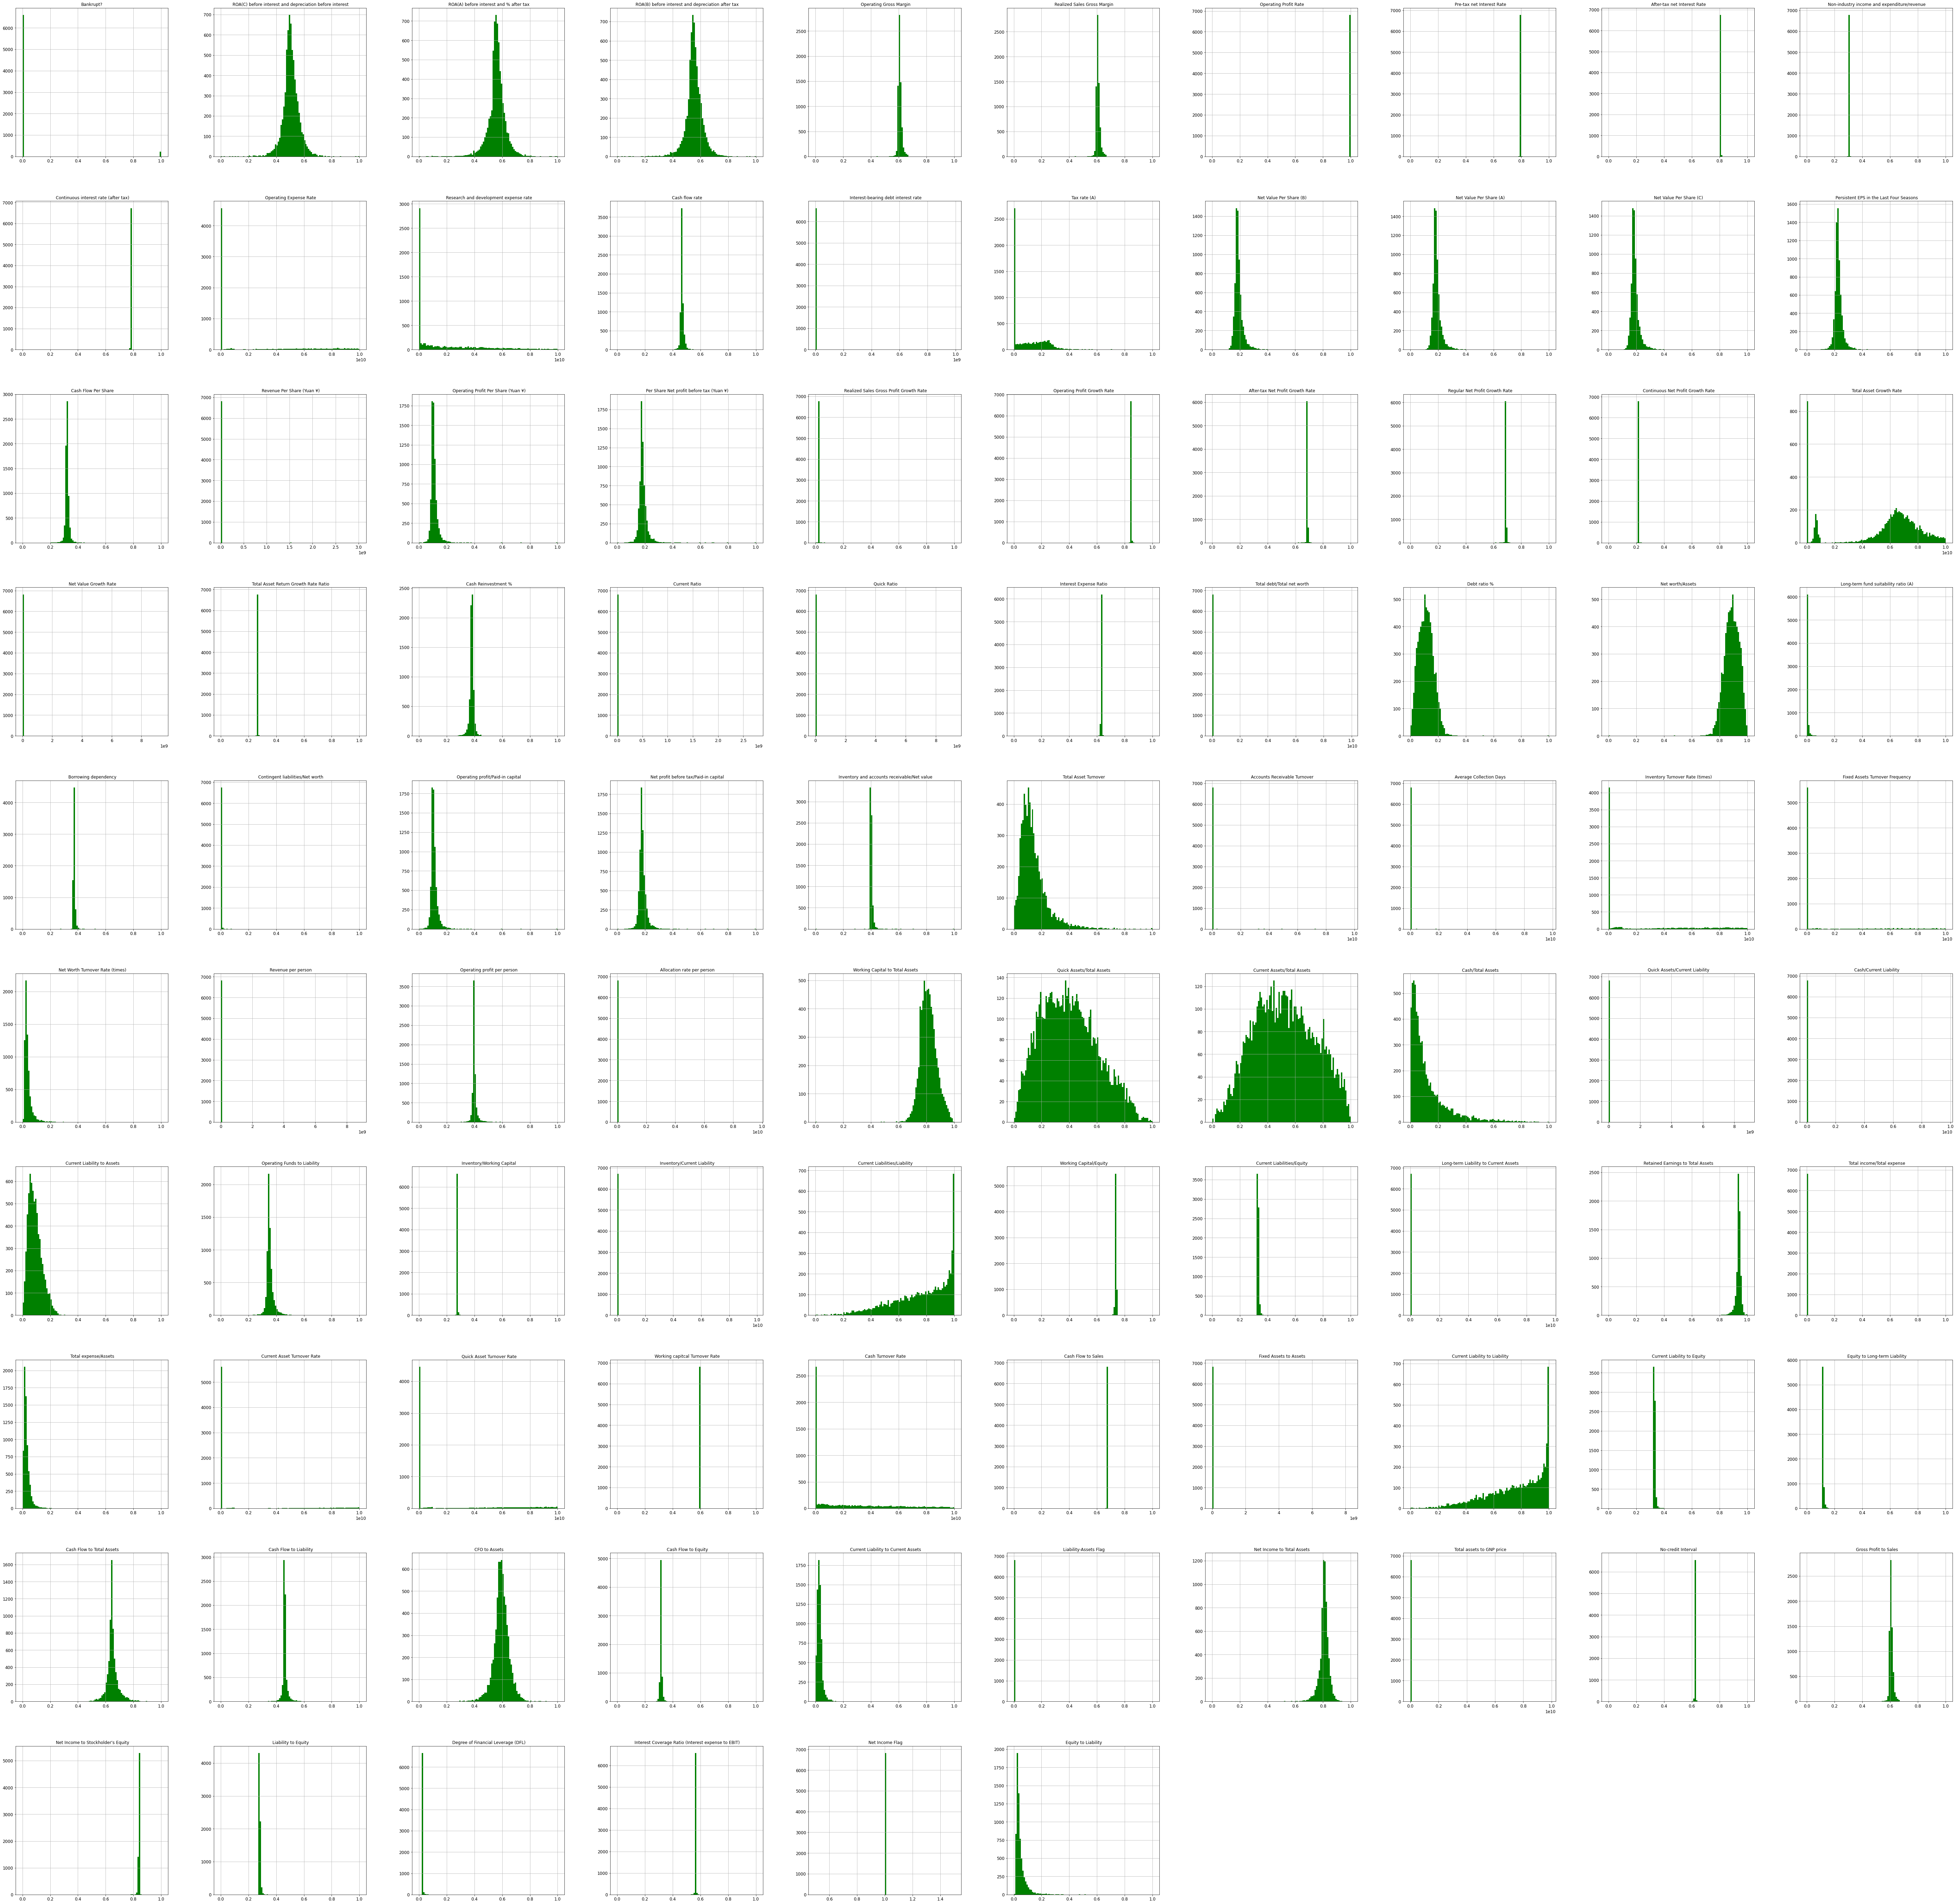

In [5]:
df_train_dup.hist(bins=100, figsize=(100,100),color='green')
plt.show()

In [6]:
df_train_dup['Bankrupt?'].describe()

count    6819.000000
mean        0.032263
std         0.176710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Bankrupt?, dtype: float64

In [7]:
df_train_dup['Bankrupt?'].value_counts(1)

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

In [8]:
df_train_dup.isnull().sum().any()

False

In [9]:
#sns.pairplot(df_train_dup,hue="Bankrupt?");

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

Count:  96


<AxesSubplot:>

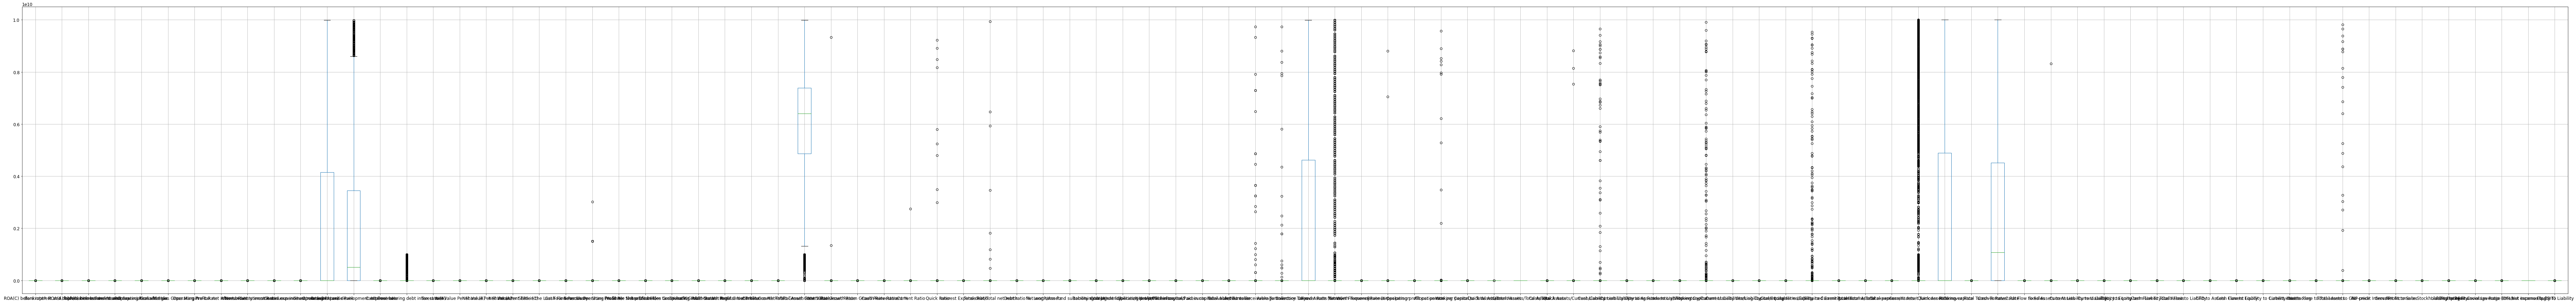

In [10]:
# Printing numeric columns and its count
num_cols = df_train_dup._get_numeric_data().columns 
display(num_cols)
print("Count: ", len(num_cols))

# Drawing box plots to check for outliers
plt.figure(figsize = (130,15))
df_train_dup.boxplot()
# Drawing box plots to check for outliers
#plt.figure(figsize = (50,50))
#for i in enumerate(num_cols):
#    plt.subplot(13,3,i[0]+1)
#    sns.boxplot(x=df_train_dup[i[1]],color='lightgreen')
#    sns.swarmplot(x=df_train_dup[i[1]],color='skyblue')
#    plt.xlabel(i[1])

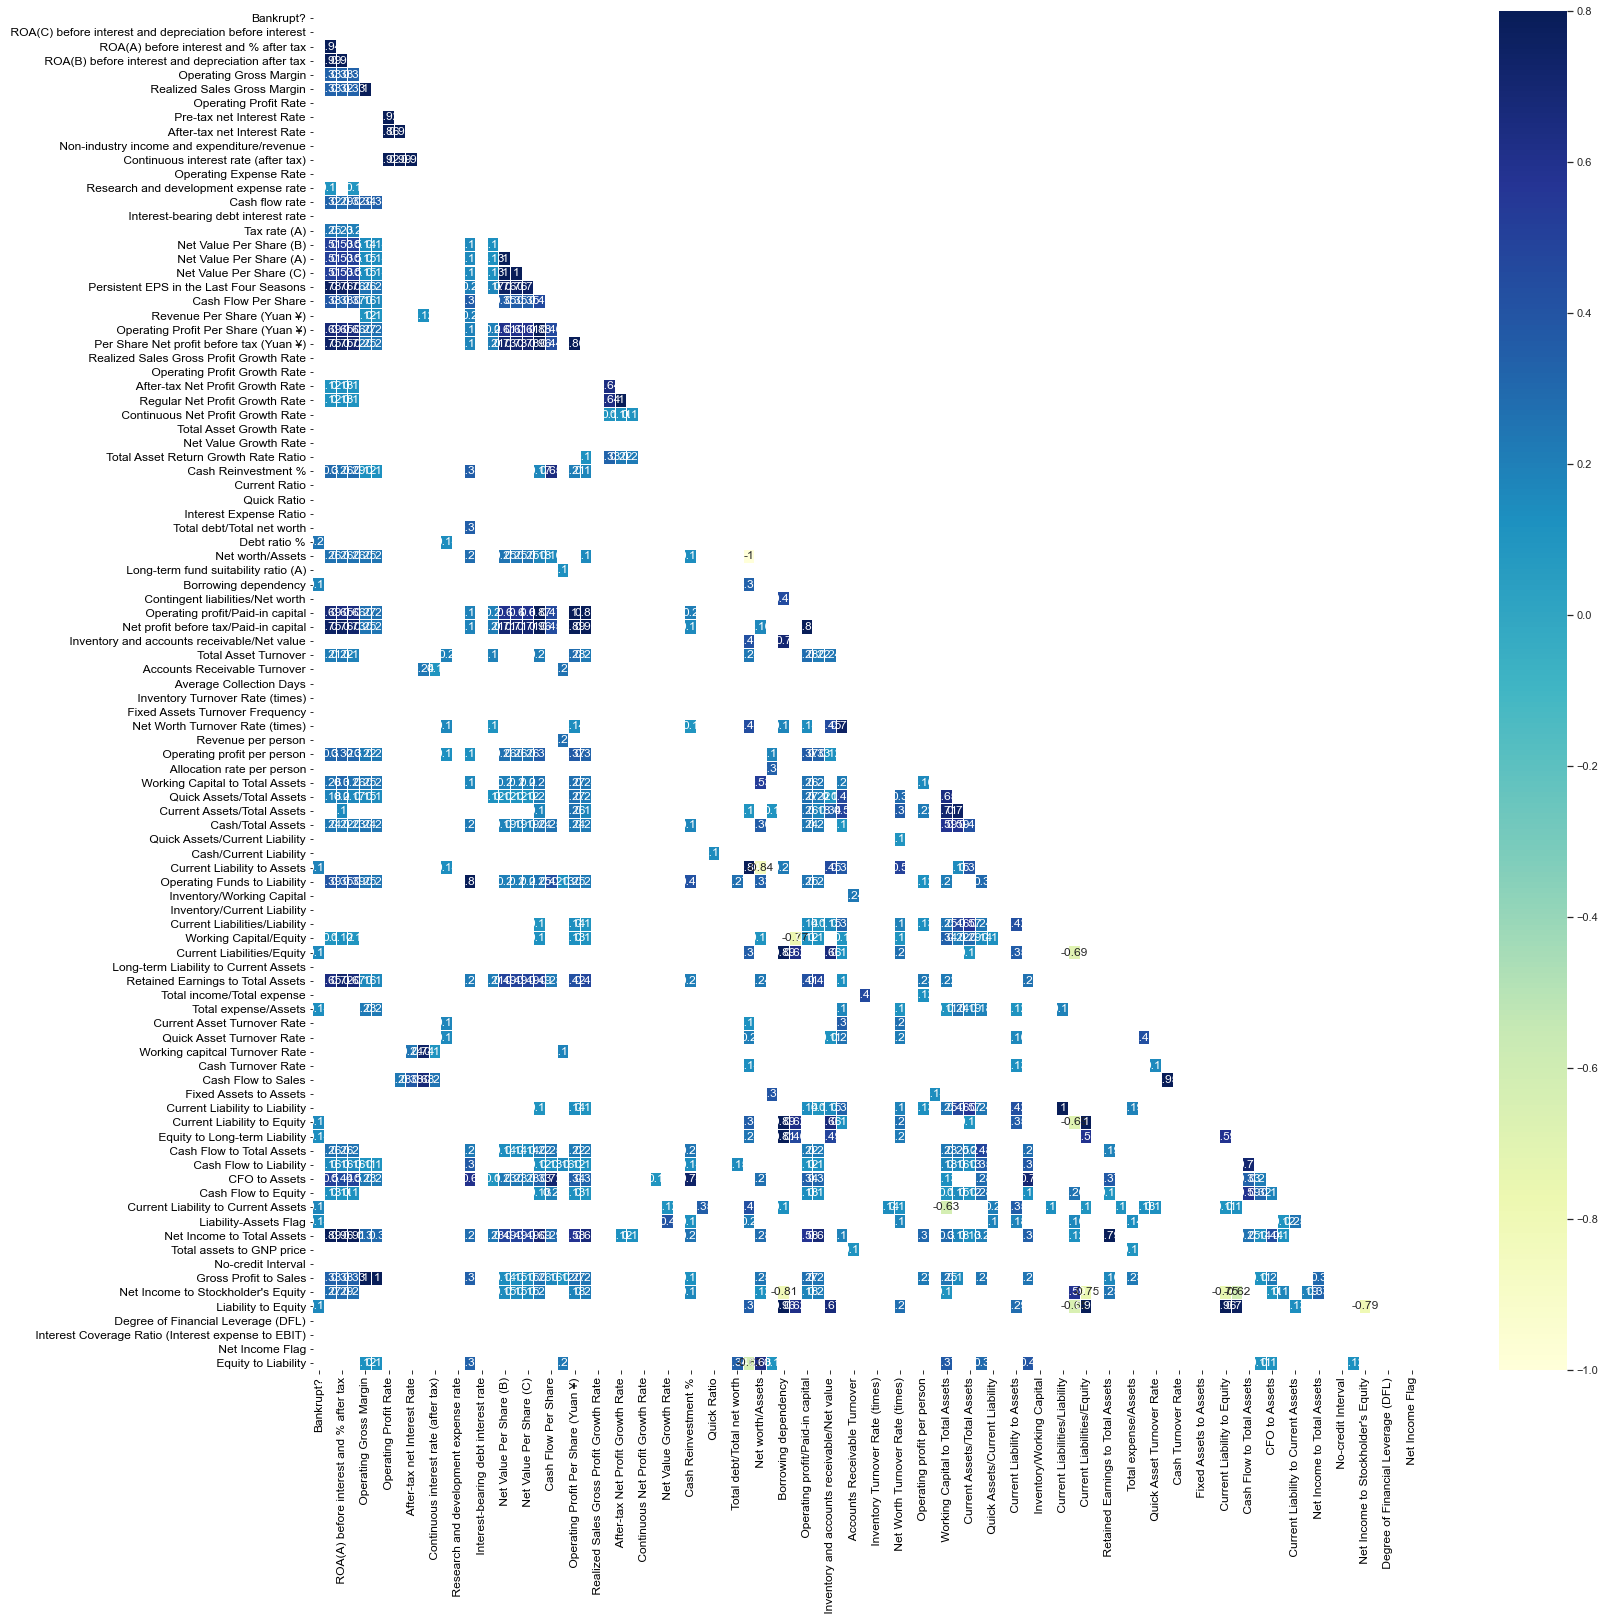

In [11]:
# Checking the Correlation variables
corrmat = df_train_dup.corr()
fig, ax = plt.subplots(figsize=(25,25))  
matrix = np.triu(df_train_dup.corr())
color = sns.color_palette("YlGnBu", as_cmap=True)
sns.set(font_scale=1)
sns.heatmap(corrmat[(corrmat >= 0.1) | (corrmat <= -0.6)], annot=True,vmax=.8, mask=matrix, ax=ax,cmap = color,linewidths=0.1);

In [12]:
df_train_dup.corr()['Bankrupt?'][(df_train_dup.corr()['Bankrupt?']>0.1) & (df_train_dup.corr()['Bankrupt?']<1)]

 Debt ratio %                           0.250161
 Borrowing dependency                   0.176543
 Current Liability to Assets            0.194494
 Current Liabilities/Equity             0.153828
 Total expense/Assets                   0.139049
 Current Liability to Equity            0.153828
 Equity to Long-term Liability          0.139014
 Current Liability to Current Assets    0.171306
 Liability-Assets Flag                  0.139212
 Liability to Equity                    0.166812
Name: Bankrupt?, dtype: float64

Correlation indicates, given data with bankruptcy variable has less correlation. 

In [13]:
#df_train_dup['NotBankrupt?']=(df_train_dup['Bankrupt?'] != 1)
df_train_dup['NotBankrupt']=df_train_dup['Bankrupt?'].apply(lambda x: 0 if x==1 else 1)
df_train_dup['NotBankrupt'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: NotBankrupt, dtype: int64

In [14]:
df_train_dup['Bankrupt?'].head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Bankrupt?, dtype: int64

In [15]:
df_train_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 97 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [16]:
df_train_dup.corr()['NotBankrupt'][(df_train_dup.corr()['NotBankrupt']>0.1) & (df_train_dup.corr()['NotBankrupt']<1)]

 ROA(C) before interest and depreciation before interest    0.260807
 ROA(A) before interest and % after tax                     0.282941
 ROA(B) before interest and depreciation after tax          0.273051
 Operating Gross Margin                                     0.100043
 Tax rate (A)                                               0.109706
 Net Value Per Share (B)                                    0.165399
 Net Value Per Share (A)                                    0.165465
 Net Value Per Share (C)                                    0.164784
 Persistent EPS in the Last Four Seasons                    0.219560
 Operating Profit Per Share (Yuan ¥)                        0.142051
 Per Share Net profit before tax (Yuan ¥)                   0.201395
 Net worth/Assets                                           0.250161
 Operating profit/Paid-in capital                           0.141111
 Net profit before tax/Paid-in capital                      0.207857
 Working Capital to Total Assets  

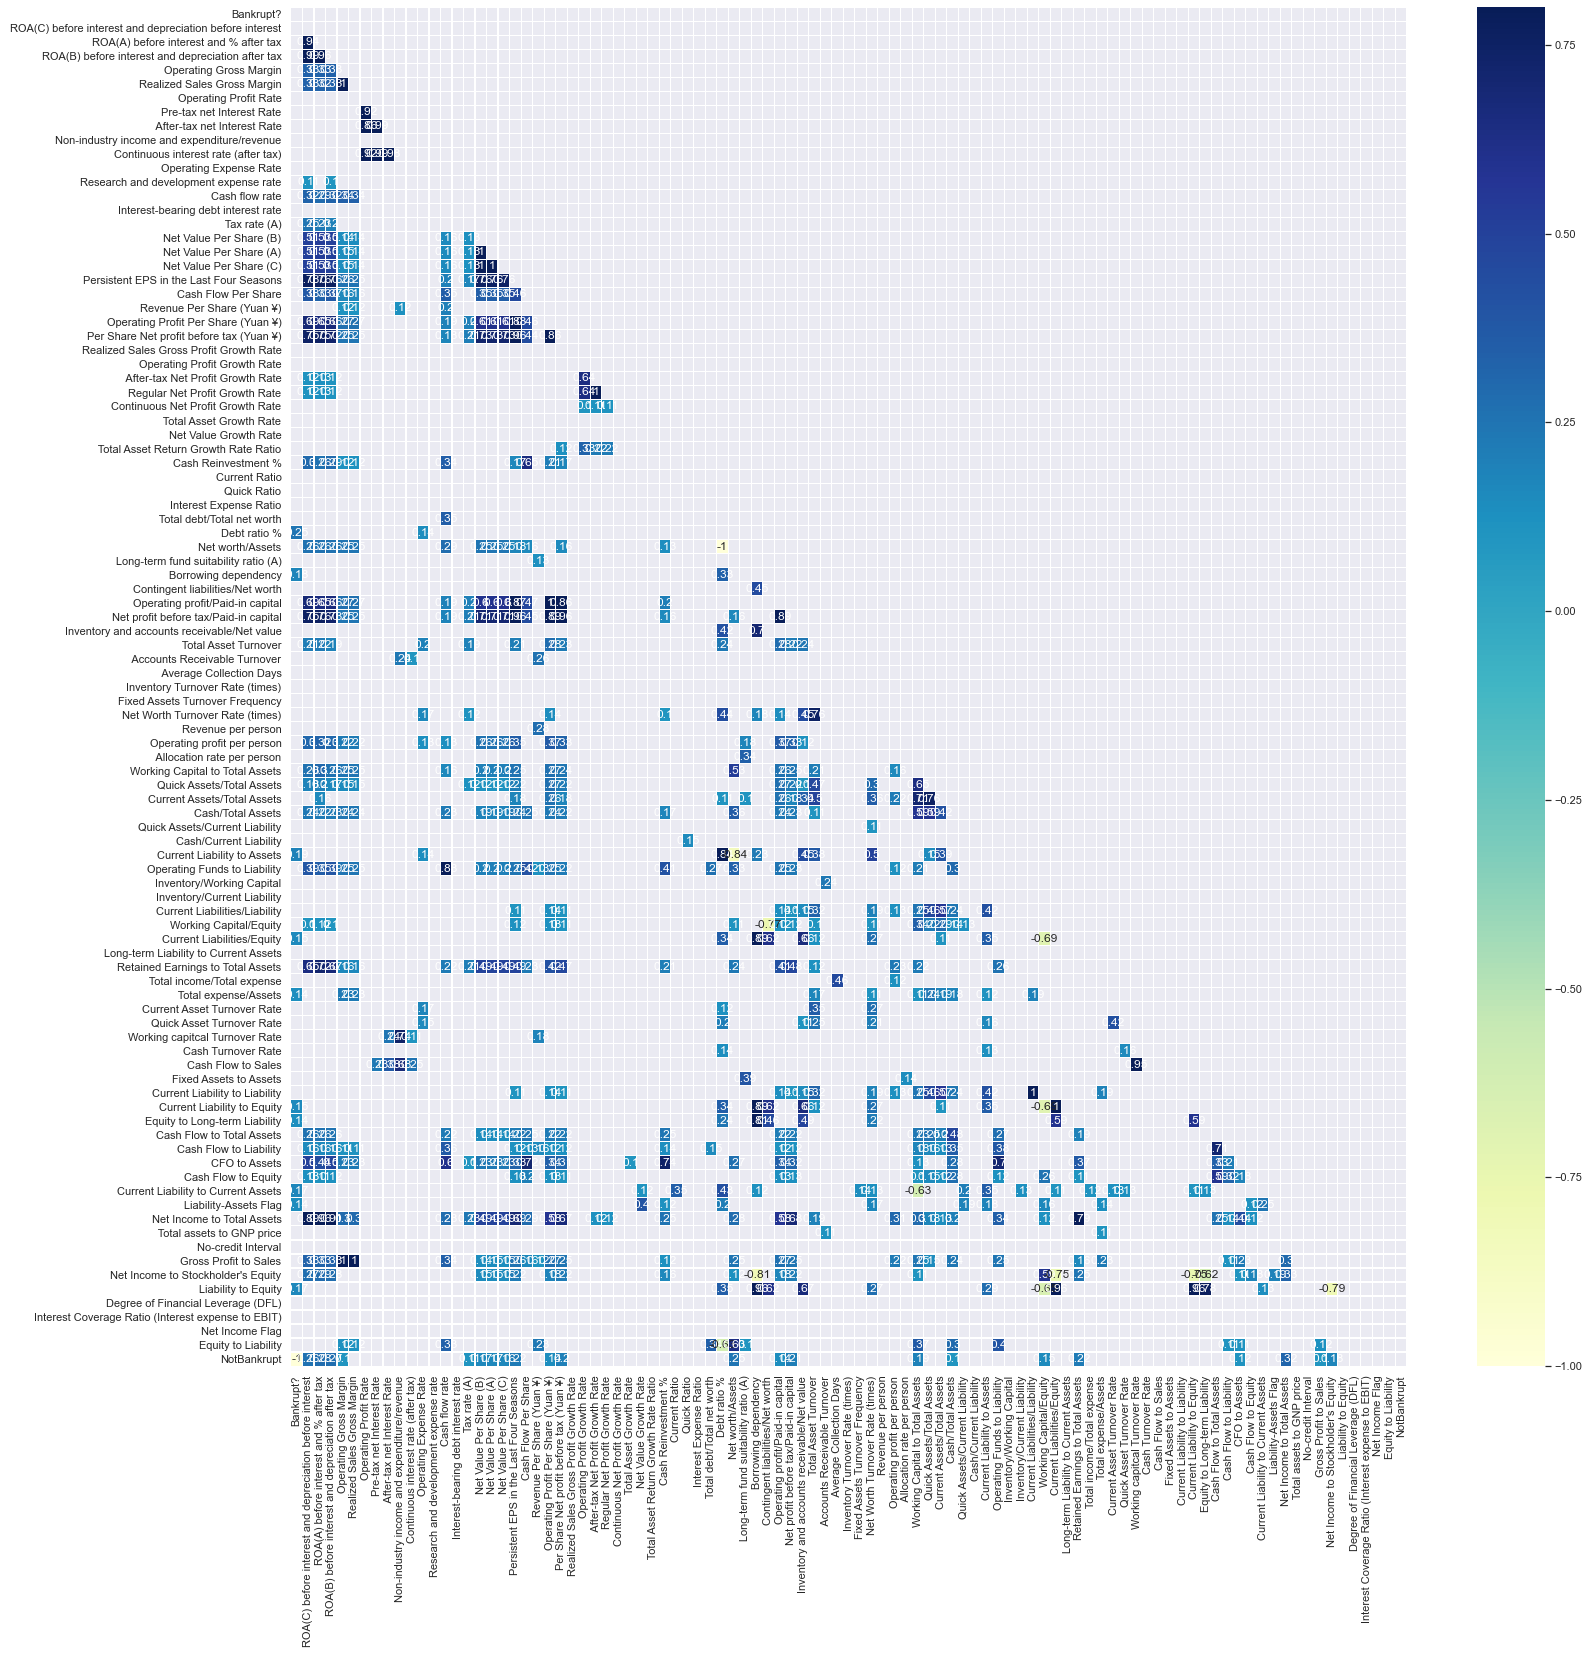

In [17]:
# Checking the Correlation variables
corrmat = df_train_dup.corr()
fig, ax = plt.subplots(figsize=(25,25))  
matrix = np.triu(df_train_dup.corr())
color = sns.color_palette("YlGnBu", as_cmap=True)
sns.set(font_scale=1)
sns.heatmap(corrmat[(corrmat >= 0.1) | (corrmat <= -0.6)], annot=True,vmax=.8, mask=matrix, ax=ax,cmap = color,linewidths=0.1);

Compared to bankruptcy data 'not bankruptcy' has higher correlation with other features. And seems like interaction among the features is dominating the correlation with target variable. 
Which makes linear models are suitable to predict the target with the given data. 

In [18]:
ntrain = df_train_dup.shape[0]
y_train = df_train_dup.NotBankrupt.values
df_train_dup=df_train_dup.drop(['NotBankrupt'], axis=1)
print("all_data size is : {}".format(df_train_dup.shape))

all_data size is : (6819, 96)


In [19]:
#dropping 'Bankrupt?' as well, since it is exactly opposite to 'NotBankrupt'
df_train_dup=df_train_dup.drop(['Bankrupt?'], axis=1)

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                                  0.180581   
3                  0.154187               

ROA(C) before interest and depreciation before interest  \
0                                          -2.217909          
1                                          -0.673828          
2                                          -1.303672          
3                                          -1.735886          
4                                          -0.661778          

    ROA(A) before interest and % after tax  \
0                                -2.045798   
1                                -0.311068   
2                                -0.908420   
3                                -1.636209   
4                                -0.307745   

    ROA(B) before interest and depreciation after tax  \
0                                          -2.400361    
1                                          -0.598450    
2                                          -1.319910    
3                                          -1.556340    
4                                          -0.508050    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                -0.383334                     -0.382638   
1                 0.135068                      0.136307   
2                -0.383759                     -0.388177   
3                -1.441418                     -1.441832   
4                -0.541238                     -0.540708   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.016456                   -0.023516   
1                0.014671                    0.014799   
2                0.007858                   -0.061111   
3               -0.004257                   -0.017313   
4                0.016758                    0.013703   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                     -0.020165                                     -0.087479   
1                      0.015966                                     -0.005957   
2                     -0.051183                                     -0.142238   
3                     -0.008676                                     -0.024491   
4                      0.016186                                     -0.013254   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                              -0.031281                -0.616334   
1                               0.009823                -0.616334   
2                              -0.086566                -0.616334   
3                              -0.011077                -0.616334   
4                               0.013300                 1.820772   

    Research and development expense rate   Cash flow rate  \
0                               -0.750713        -0.545256   
1                               -0.750713        -0.326632   
2                               -0.740898        -0.523098   
3                               -0.750713        -0.101310   
4                               -0.750713        -0.275028   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                             -0.151921      -0.829388   
1                             -0.151921      -0.829388   
2                             -0.151921      -0.829388   
3                             -0.151921      -0.829388   
4                             -0.151921      -0.829388   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                 -1.279247                 -1.275228   
1                 -0.251878                 -0.250429   
2                 -0.381876                 -0.380102   
3                 -1.092453                 -1.088901   
4                 -0.693621                 -0.691067   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                 -1.276147                                 -1.794106   
1                 -0.251550                                 -0.597379   
2                  0.090822                                 -1.450153   
3                 -1.089856               

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.258227e-14   
1                               0.781506             2.900751e-14   
2                               0.780284             2.363661e-14   
3                               0.781241             1.079968e-14   
4                               0.781550             7.897898e-01   

    Research and development expense rate   Cash flow rate  \
0                                0.000000         0.458143   
1                                0.000000         0.461867   
2                                0.002555         0.458521   
3                                0.000000         0.465705   
4                                0.000000         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                          7.323965e-13            0.0   
1                          6.536007e-13            0.0   
2                          7.980596e-13            0.0   
3                          4.535807e-13            0.0   
4                          6.929986e-13            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                                  0.180581   
3                  0.154187               

Plain data:
Scalled data:
Minmax scalled data:


<AxesSubplot:>

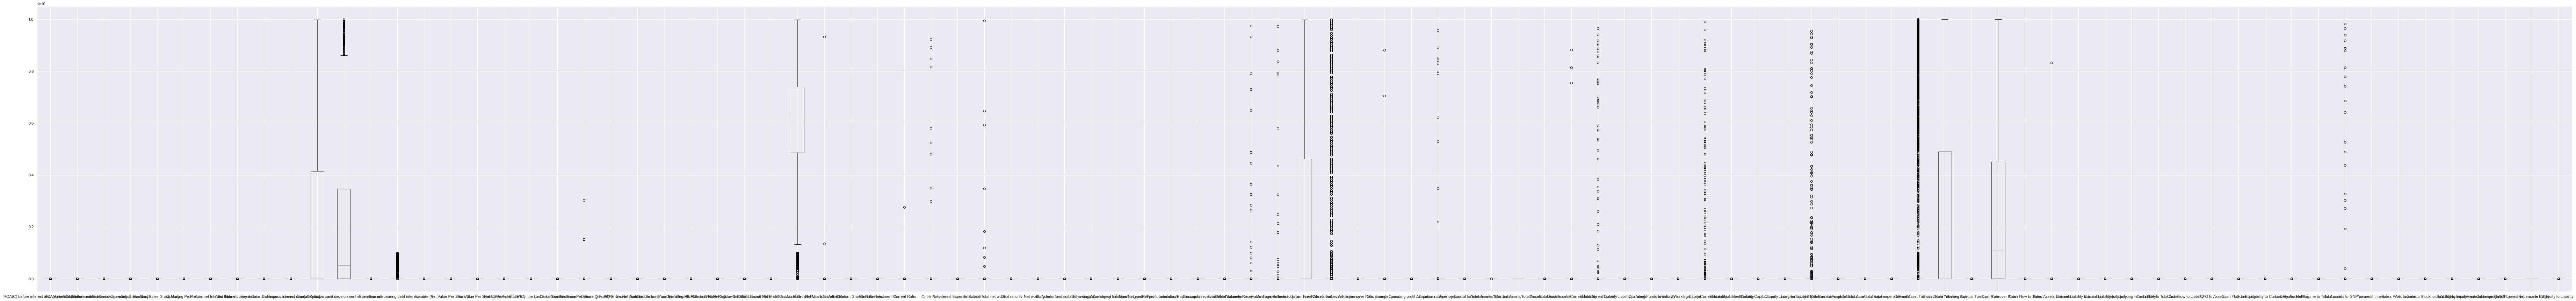

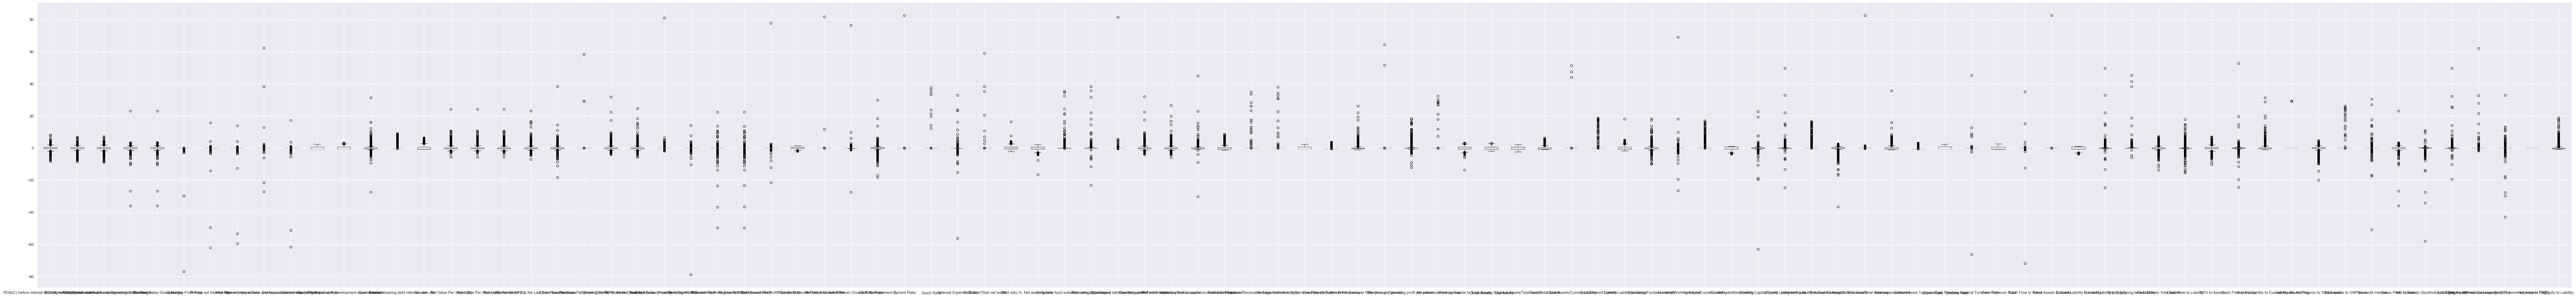

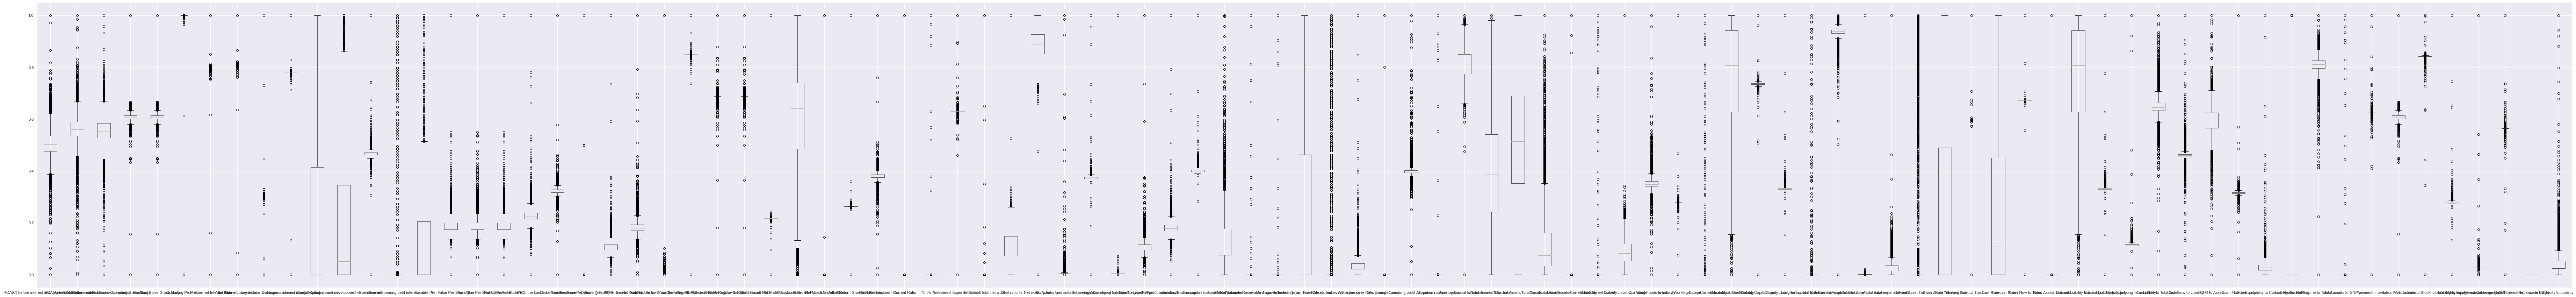

In [20]:
df_train_dup_scale = df_train_dup.copy()
df_train_dup_minmax = df_train_dup.copy()

df_train_dup_scale[df_train_dup_scale.columns]=preprocessing.scale(df_train_dup_scale[df_train_dup_scale.columns])

# define min max scaler
scaler = MinMaxScaler()
df_train_dup_minmax[df_train_dup_minmax.columns] = scaler.fit_transform(df_train_dup_minmax[df_train_dup_minmax.columns])

display(df_train_dup.head())
display(df_train_dup_scale.head())
display(df_train_dup_minmax.head())
print("Plain data:")
# Drawing box plots to check for outliers
plt.figure(figsize = (130,15))
df_train_dup.boxplot()
print("Scalled data:")
# Drawing box plots to check for outliers
plt.figure(figsize = (130,15))
df_train_dup_scale.boxplot()
print("Minmax scalled data:")
# Drawing box plots to check for outliers
plt.figure(figsize = (130,15))
df_train_dup_minmax.boxplot()

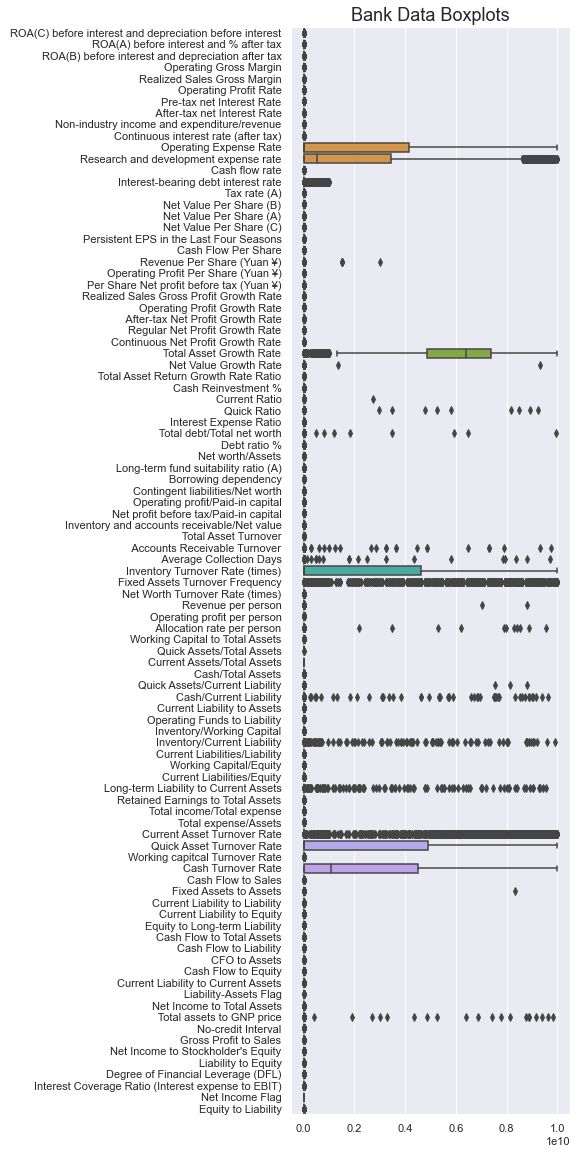

In [21]:
# Plotting Boxplots of the numerical features
plt.figure(figsize = (5,20))
ax =sns.boxplot(data = df_train_dup, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
#ax.set(xscale="log")
plt.show()

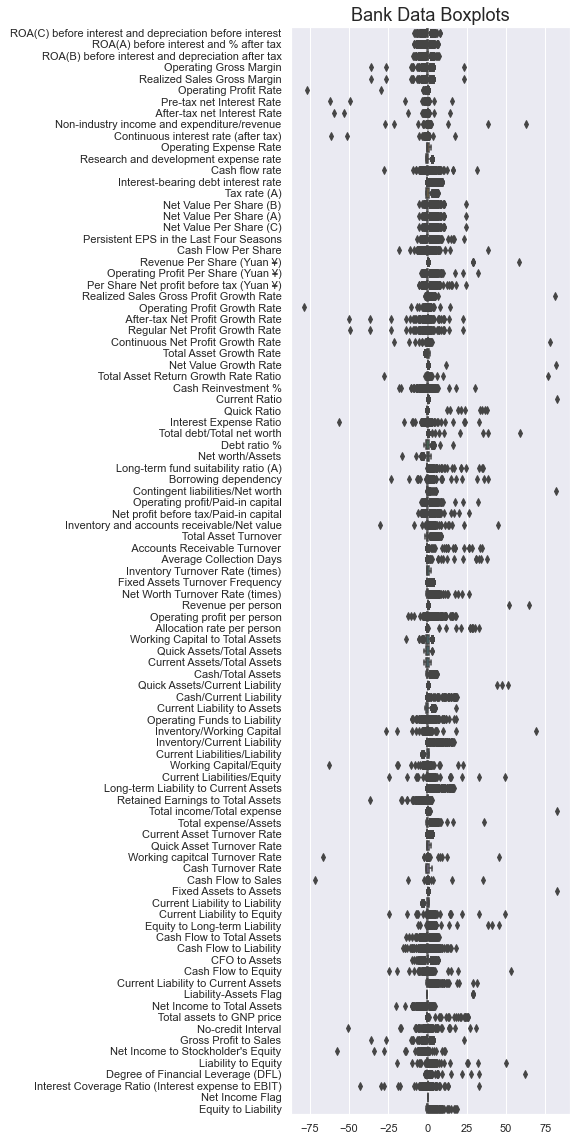

In [22]:
# Plotting Boxplots of the numerical features
plt.figure(num=2,figsize = (5,20))
ax =sns.boxplot(data = df_train_dup_scale, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
#ax.set(xscale="log")
plt.show()

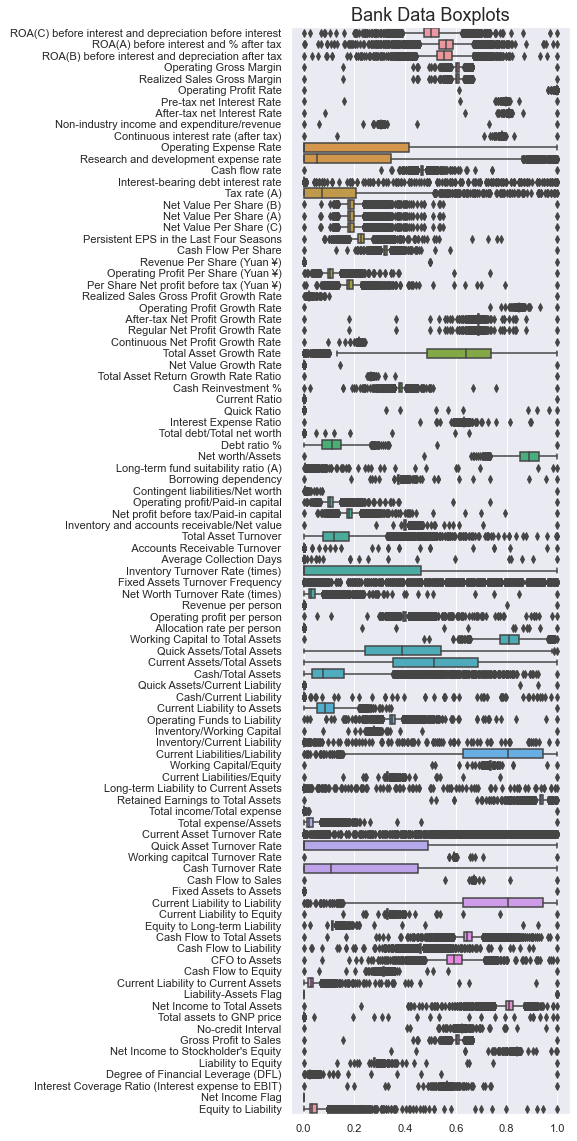

In [23]:
# Plotting Boxplots of the numerical features
plt.figure(num=2,figsize = (5,20))
ax =sns.boxplot(data = df_train_dup_minmax, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
#ax.set(xscale="log")
plt.show()

In [24]:
#splitting data in to train and validation sets
df_train_dup_scale["NotBankrupt"] = y_train
# train-test 80-20 split
df_train_reg, df_test_reg = train_test_split(df_train_dup_scale, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 13)

# Divide into X_train, y_train, X_test, y_test
y_train_1 = df_train_reg.pop('NotBankrupt')
X_train_1 = df_train_reg

y_test_1 = df_test_reg.pop('NotBankrupt')
X_test_1 = df_test_reg

R^2 Scores:  [-6.51111886e-03 -8.23384291e+16  1.71228975e-01 -1.03749976e+00
 -1.21350876e+00 -2.97191431e+15  9.69853293e-02 -8.75311564e+00
 -3.62746209e+00 -1.80908313e+01]

RMSE Scores:  [-2.09703419e-01 -4.37465619e+07 -1.58116406e-01 -2.09275020e-01
 -2.43187288e-01 -9.47682937e+06 -1.55465656e-01 -4.19133212e-01
 -4.32488040e-01 -8.21505674e-01]
Coefficients= [-6.32047925e-02 -8.11899699e-02  9.64233389e-02 -1.84236368e+00
  9.85417542e-02  4.67239315e+02 -3.86134852e+02 -6.84102712e-03
  1.91668939e+02  1.01968338e-01 -5.45607342e-04 -2.70814345e-03
  3.43262543e-03 -1.83847892e-03  1.09777320e-02  4.81443577e-02
  1.38868756e-01 -1.86756494e-01  8.07768315e-03  1.87800020e-03
  6.61753995e-03  4.57118223e-02 -4.83070229e-03 -1.19529635e-03
  5.58407694e-03 -1.11597764e-02  5.42941321e-03 -6.78736826e-04
  8.37875318e-04 -2.28832017e-03 -5.64181962e-05 -1.66943443e-03
  2.80558902e-03 -1.11372527e-03 -7.62054707e-04 -1.94006577e-03
 -3.73663752e+11 -3.73663752e+11 -5.23774257e

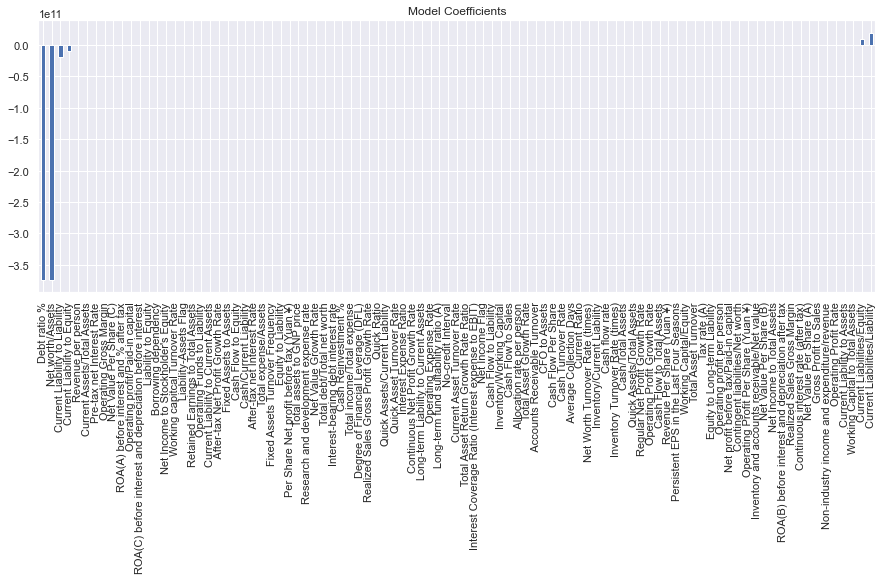

In [25]:
#Basic linear regression
model = LinearRegression()
model.fit(X_train_1, y_train_1)
predicted_prices_regr = model.predict(X_test_1)

#RMSE
rmse = mean_squared_error(y_test_1, predicted_prices_regr, squared=False)
rmse

# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='r2', cv=folds)
print("R^2 Scores: ",scores)

# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='neg_root_mean_squared_error', cv=folds)
print("")
print("RMSE Scores: ",scores)  
# Let us explore the coefficients for each of the independent attributes
print("Coefficients=",model.coef_)
#checking the magnitude of coefficients
predictors = X_train_1.columns
coef = pd.Series(model.coef_.flatten(), predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients', figsize=(15,5));
# R square on training data
print("R square on training data:",model.score(X_train_1, y_train_1))
print("R square on training data:",model.score(X_test_1, y_test_1))
RMSE_lr_train = metrics.mean_squared_error(y_true = y_train_1, y_pred=model.predict(X_train_1),squared=False)
RMSE_lr_test = metrics.mean_squared_error(y_true = y_test_1, y_pred=model.predict(X_test_1), squared=False)
resultsDf = pd.DataFrame({'Train RMSE': [RMSE_lr_train],'Test RMSE': [RMSE_lr_test]},index=['LinearRegression'])
print(resultsDf)

In [26]:
#SVM regression
svc = SVC()
param_svc = {'C':[1,2,3,4,5],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[3,4,5]}

#svc_gridsearch = GridSearchCV(estimator=svc,param_grid=param_svc,cv=LeaveOneOut(),scoring='recall',n_jobs=-1)
svc_gridsearch = GridSearchCV(estimator=svc,param_grid=param_svc,cv=3,scoring='recall',n_jobs=-1)
svc_gridsearch.fit(X_train_1,y_train_1)
print(svc_gridsearch.best_params_)
print(svc_gridsearch.best_estimator_.score(X_train_1,y_train_1))
print(svc_gridsearch.best_estimator_.score(X_test_1,y_test_1))
## Performance Matrix on test data set
y_pred_svm=svc_gridsearch.best_estimator_.predict(X_test_1)
print(metrics.classification_report(y_true=y_test_1,y_pred=y_pred_svm))

{'C': 1, 'degree': 3, 'kernel': 'rbf'}
0.9739688359303391
0.9618768328445748
              precision    recall  f1-score   support

           0       0.67      0.04      0.07        53
           1       0.96      1.00      0.98      1311

    accuracy                           0.96      1364
   macro avg       0.81      0.52      0.53      1364
weighted avg       0.95      0.96      0.95      1364



In [27]:
#Logistic Regression
LR = LogisticRegression(max_iter=100000000000)
## Training data score and model fitting
LR.fit(X_train_1,y_train_1)
LR.score(X_train_1,y_train_1)

0.9747021081576536

In [28]:
## Test data scoring
LR.score(X_test_1,y_test_1)

0.9574780058651027

In [29]:
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'C':[1,2,3,4,5,6]}

In [30]:
#LR_tune = GridSearchCV(estimator=LR,param_grid=parameters,cv=LeaveOneOut(),n_jobs=-1)
LR_tune = GridSearchCV(estimator=LR,param_grid=parameters,cv=3,n_jobs=-1)
LR_tune.fit(X_train_1,y_train_1)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000000000),
             n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [31]:
LR_tune.best_params_

{'C': 1, 'penalty': 'l2'}

In [32]:
LR_tune.best_estimator_.score(X_train_1,y_train_1)

0.9747021081576536

In [33]:
y_pred_train_lr=LR_tune.best_estimator_.predict(X_train_1)
metrics.confusion_matrix(y_true=y_train_1,y_pred=y_pred_train_lr)

array([[  47,  120],
       [  18, 5270]])

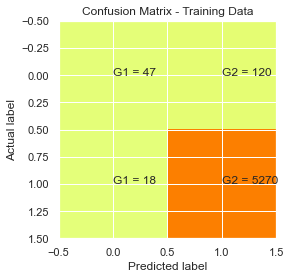

In [34]:
cm = metrics.confusion_matrix(y_true=y_train_1,y_pred=y_pred_train_lr)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Training Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [35]:
## Model evaluation on the test data
y_pred_lr=LR_tune.best_estimator_.predict(X_test_1)
print(metrics.classification_report(y_true=y_test_1,y_pred=y_pred_lr))

              precision    recall  f1-score   support

           0       0.39      0.17      0.24        53
           1       0.97      0.99      0.98      1311

    accuracy                           0.96      1364
   macro avg       0.68      0.58      0.61      1364
weighted avg       0.94      0.96      0.95      1364



In [36]:
#Gaussian Naive Bayes
GNB_model = GaussianNB()
#BN_NB = BernoulliNB()
m_3 = GNB_model.fit(X_train_1,y_train_1)
y_pred_train_gnb = m_3.predict(X_train_1)
model_score = m_3.score(X_train_1, y_train_1)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train_1, y_pred_train_gnb))          ## confusion_matrix
print(metrics.classification_report(y_train_1, y_pred_train_gnb))     ## classification_report

0.4672777268560953
[[ 156   11]
 [2895 2393]]
              precision    recall  f1-score   support

           0       0.05      0.93      0.10       167
           1       1.00      0.45      0.62      5288

    accuracy                           0.47      5455
   macro avg       0.52      0.69      0.36      5455
weighted avg       0.97      0.47      0.61      5455



In [37]:
## Performance Matrix on test data set
y_pred_gnb = m_3.predict(X_test_1)
model_score = m_3.score(X_test_1, y_test_1)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test_1, y_pred_gnb))         ## confusion_matrix
print(metrics.classification_report(y_test_1, y_pred_gnb))    ## classification_report

0.4838709677419355
[[ 48   5]
 [699 612]]
              precision    recall  f1-score   support

           0       0.06      0.91      0.12        53
           1       0.99      0.47      0.63      1311

    accuracy                           0.48      1364
   macro avg       0.53      0.69      0.38      1364
weighted avg       0.96      0.48      0.61      1364



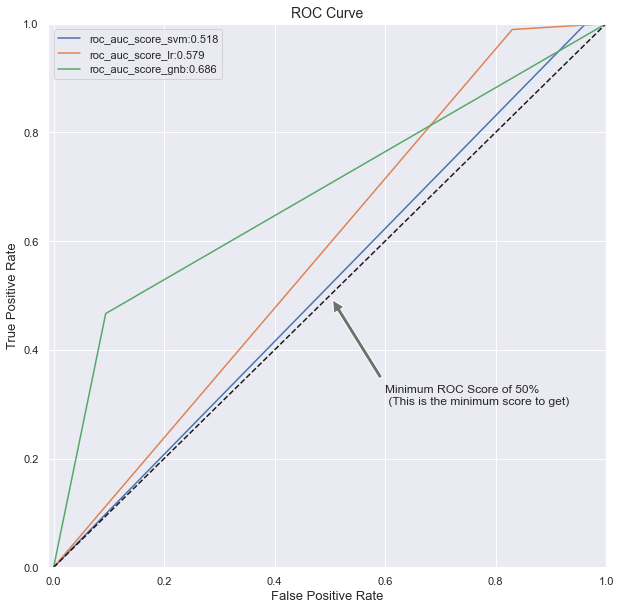

In [38]:
#ROC curve
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test_1, y_pred_svm)
lr_fpr, lr_tpr, lr_thresold = roc_curve(y_test_1, y_pred_lr)
gnb_fpr, gnb_tpr, gnb_thresold = roc_curve(y_test_1, y_pred_gnb)
roc_auc_score_svm=roc_auc_score(y_test_1, y_pred_svm)
roc_auc_score_lr=roc_auc_score(y_test_1, y_pred_lr)
roc_auc_score_gnb=roc_auc_score(y_test_1, y_pred_gnb)

def graph_roc_curve_multiple(svm_fpr, svm_tpr,lr_fpr, lr_tpr,gnb_fpr, gnb_tpr):
    plt.figure(figsize=(10,10))
    plt.title('ROC Curve', fontsize=14)
    plt.plot(svm_fpr, svm_tpr, label='roc_auc_score_svm:%.5s' % roc_auc_score_svm)
    plt.plot(lr_fpr, lr_tpr, label='roc_auc_score_lr:%.5s' % roc_auc_score_lr)
    plt.plot(gnb_fpr, gnb_tpr, label='roc_auc_score_gnb:%.5s' % roc_auc_score_gnb)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(svm_fpr, svm_tpr,lr_fpr, lr_tpr,gnb_fpr, gnb_tpr)
plt.show()